In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
collision_color = 'burlywood'
momentum_color = 'darkorange'
periodic_color = 'chocolate'
couette_color = 'saddlebrown'
leesed_color = 'darkgoldenrod'

In [320]:
collision_color = 'dimgray'
momentum_color = 'darkgray'
periodic_color = 'silver'
couette_color = 'lightgray'
leesed_color = 'whitesmoke'

In [3]:
collision_color = 'darkcyan'
momentum_color = 'cadetblue'
periodic_color = 'powderblue'
couette_color = 'skyblue'
leesed_color = 'paleturquoise'

In [4]:
per_sat = 'indianred'
cou_sat = 'slateblue'
leesed_sat = 'purple'

In [5]:
color_baseline = 'coral'
color1 = 'red'
color2 = 'crimson'
color3 = 'firebrick'
color4 = 'darkred'

In [6]:
from matplotlib.colors import to_rgba
def desaturate_color(color, factor=0.5):
    """
    Desaturate a given color by blending it with white.
    
    Parameters:
    - color: The original color as a string or RGB tuple.
    - factor: The factor by which to desaturate the color (0 = original color, 1 = white).
    
    Returns:
    - The desaturated color as an RGB tuple.
    """
    white = np.array([1, 1, 1, 1])
    color = np.array(to_rgba(color))
    desaturated_color = color + (white - color) * factor
    return desaturated_color

In [7]:
#desaturate color
collision_color = desaturate_color(collision_color)
momentum_color = desaturate_color(momentum_color)
periodic_color = desaturate_color(periodic_color)
couette_color = desaturate_color(couette_color)
leesed_color = desaturate_color(leesed_color)

In [8]:
def get_data(file, name):
    f = file[file['function'] == name]
    iops = f['iops'].to_numpy()
    flops = f['flops'].to_numpy()
    bytes_read = f['bytes_read'].to_numpy()
    bytes_write = f['bytes_write'].to_numpy()
    cycles = f['cycles'].to_numpy()
    dir = f['DIRECTION_SIZE'].to_numpy()
    return iops, flops, bytes_read, bytes_write, cycles, dir


In [9]:

#FOR THE STACKPLOT/BOTTLENECK
def plot_stack(grid_sizes, collision_cycles, momentum_cycles, stream_cycles, name):
    # Convert grid sizes to a numerical format for the x-axis
    x = np.arange(len(grid_sizes))

    # Stack plot data
    y = np.vstack([collision_cycles, momentum_cycles, stream_cycles])

    # Plotting
    fig, ax = plt.subplots()
    ax.stackplot(x, y, labels=['Collision', 'Momentum', name])

    ax.text(3, 25, 'Collision', fontsize=10, color='black', va='center')
    ax.text(4, 50, 'Momentum', fontsize=10, color='black', va='center')
    ax.text(3, 85, name, fontsize=10, color='black', va='center')
    ax.spines['left'].set_position('zero')

    # Customizing the plot
    ax.set_xticks(x)
    ax.set_xticklabels(grid_sizes)
    ax.set_xlabel('Grid Size')
    ax.set_ylabel('Percentage of Total Cycles')
    ax.set_title('Cycles for Different Grid Sizes')
    #ax.legend(loc='upper left')
    #ax.set_yscale('log')

    # Display the plot
    plt.show()


In [57]:
csv_file_path = "TimingData.csv"
df = pd.read_csv(csv_file_path)

In [11]:
#cost function
def cost(flops, iops):
    return flops + iops

In [58]:
############ BASELINE ##############################################################
#variables
cb_iops, cb_flops, cb_bytes_read, cb_bytes_write, cb_cycles, cb_dir = get_data(df, 'Collision Baseline')
mb_iops, mb_flops, mb_bytes_read, mb_bytes_write, mb_cycles, mb_dir = get_data(df, 'Momentum Baseline')
pb_iops, pb_flops, pb_bytes_read, pb_bytes_write, pb_cycles, pb_dir = get_data(df, 'Stream Periodic Baseline')
cob_iops, cob_flops, cob_bytes_read, cob_bytes_write, cob_cycles, cob_dir = get_data(df, 'Stream Couette Baseline')
lb_iops, lb_flops, lb_bytes_read, lb_bytes_write, lb_cycles, lb_dir = get_data(df, 'Stream Lees Edwards Baseline')

#total iops - periodic, couette, lees
bp_iops = cb_iops + mb_iops + pb_iops
bc_iops = cb_iops + mb_iops + cob_iops
bl_iops = cb_iops + mb_iops + lb_iops

#total flops - periodic, couette, lees
bp_flops = cb_flops + mb_flops + pb_flops
bc_flops = cb_flops + mb_flops + cob_flops
bl_flops = cb_flops + mb_flops + lb_flops

#total flops - periodic, couette, lees
bp_cycles = cb_cycles + mb_cycles + pb_cycles
bc_cycles = cb_cycles + mb_cycles + cob_cycles
bl_cycles = cb_cycles + mb_cycles + lb_cycles


#percentage
cpb_percentage = cb_cycles*100/bp_cycles
mpb_percentage = mb_cycles*100/bp_cycles
spb_percentage = pb_cycles*100/bp_cycles

ccb_percentage = cb_cycles*100/bc_cycles
mcb_percentage = mb_cycles*100/bc_cycles
scb_percentage = cob_cycles*100/bc_cycles

clb_percentage = cb_cycles*100/bl_cycles
mlb_percentage = mb_cycles*100/bl_cycles
slb_percentage = lb_cycles*100/bl_cycles

#performance
perflops_performance = bp_flops/bp_cycles
couflops_performance = bc_flops/bc_cycles
leesflops_performance = bl_flops/bl_cycles

periops_performance = bp_iops/bp_cycles
couiops_performance = bc_iops/bc_cycles
leesiops_performance = bl_iops/bl_cycles

pperf = cost(bp_flops, bp_iops)/bp_cycles
cperf = cost(bc_flops, bc_iops)/bc_cycles
lperf = cost(bl_flops, bl_iops)/bl_cycles






In [59]:
############ Optimization 1 ##############################################################
#variables
# Fetching data
c1_iops, c1_flops, c1_bytes_read, c1_bytes_write, c1_cycles, c1_dir = get_data(df, 'Collision 1')
m1_iops, m1_flops, m1_bytes_read, m1_bytes_write, m1_cycles, m1_dir = get_data(df, 'Momentum 1')
p1_iops, p1_flops, p1_bytes_read, p1_bytes_write, p1_cycles, p1_dir = get_data(df, 'Periodic 1')
co1_iops, co1_flops, co1_bytes_read, co1_bytes_write, co1_cycles, co1_dir = get_data(df, 'Couette 1')
l1_iops, l1_flops, l1_bytes_read, l1_bytes_write, l1_cycles, l1_dir = get_data(df, 'Lees Edwards 1')

# Total iops - periodic, couette, lees
tp1_iops = c1_iops + m1_iops + p1_iops
tc1_iops = c1_iops + m1_iops + co1_iops
tl1_iops = c1_iops + m1_iops + l1_iops

# Total flops - periodic, couette, lees
tp1_flops = c1_flops + m1_flops + p1_flops
tc1_flops = c1_flops + m1_flops + co1_flops
tl1_flops = c1_flops + m1_flops + l1_flops

# Total cycles - periodic, couette, lees
tp1_cycles = c1_cycles + m1_cycles + p1_cycles
tc1_cycles = c1_cycles + m1_cycles + co1_cycles
tl1_cycles = c1_cycles + m1_cycles + l1_cycles

#percentage
cp1_percentage = c1_cycles*100/tp1_cycles
mp1_percentage = m1_cycles*100/tp1_cycles
sp1_percentage = p1_cycles*100/tp1_cycles

cc1_percentage = c1_cycles*100/tc1_cycles
mc1_percentage = m1_cycles*100/tc1_cycles
sc1_percentage = co1_cycles*100/tc1_cycles

cl1_percentage = c1_cycles*100/tl1_cycles
ml1_percentage = m1_cycles*100/tl1_cycles
sl1_percentage = l1_cycles*100/tl1_cycles

#performance
perflops_performance1 = tp1_flops/tp1_cycles
couflops_performance1 = tc1_flops/tc1_cycles
leesflops_performance1 = tl1_flops/tl1_cycles

periops_performance1 = tp1_iops/tp1_cycles
couiops_performance1 = tc1_iops/tc1_cycles
leesiops_performance1 = tl1_iops/tl1_cycles

pperf1 = cost(tp1_flops, tp1_iops)/tp1_cycles
cperf1 = cost(tc1_flops, tc1_iops)/tc1_cycles
lperf1 = cost(tl1_flops, tl1_iops)/tl1_cycles





In [60]:
############ Optimization 2 ##############################################################
# Fetching data
c2_iops, c2_flops, c2_bytes_read, c2_bytes_write, c2_cycles, c2_dir = get_data(df, 'Collision 2')
m2_iops, m2_flops, m2_bytes_read, m2_bytes_write, m2_cycles, m2_dir = get_data(df, 'Momentum 2')
p2_iops, p2_flops, p2_bytes_read, p2_bytes_write, p2_cycles, p2_dir = get_data(df, 'Periodic 2')
co2_iops, co2_flops, co2_bytes_read, co2_bytes_write, co2_cycles, co2_dir = get_data(df, 'Couette 2')
l2_iops, l2_flops, l2_bytes_read, l2_bytes_write, l2_cycles, l2_dir = get_data(df, 'Lees Edwards 2')

# Total iops - periodic, couette, lees
tp2_iops = c2_iops + m2_iops + p2_iops
tc2_iops = c2_iops + m2_iops + co2_iops
tl2_iops = c2_iops + m2_iops + l2_iops

# Total flops - periodic, couette, lees
tp2_flops = c2_flops + m2_flops + p2_flops
tc2_flops = c2_flops + m2_flops + co2_flops
tl2_flops = c2_flops + m2_flops + l2_flops

# Total cycles - periodic, couette, lees
tp2_cycles = c2_cycles + m2_cycles + p2_cycles
tc2_cycles = c2_cycles + m2_cycles + co2_cycles
tl2_cycles = c2_cycles + m2_cycles + l2_cycles


#percentage
cp2_percentage = c2_cycles*100/tp2_cycles
mp2_percentage = m2_cycles*100/tp2_cycles
sp2_percentage = p2_cycles*100/tp2_cycles

cc2_percentage = c2_cycles*100/tc2_cycles
mc2_percentage = m2_cycles*100/tc2_cycles
sc2_percentage = co2_cycles*100/tc2_cycles

cl2_percentage = c2_cycles*100/tl2_cycles
ml2_percentage = m2_cycles*100/tl2_cycles
sl2_percentage = l2_cycles*100/tl2_cycles

#performance
perflops_performance2 = tp2_flops/tp2_cycles
couflops_performance2 = tc2_flops/tc2_cycles
leesflops_performance2 = tl2_flops/tl2_cycles

periops_performance2 = tp2_iops/tp2_cycles
couiops_performance2 = tc2_iops/tc2_cycles
leesiops_performance2 = tl2_iops/tl2_cycles

pperf2 = cost(tp2_flops, tp2_iops)/tp2_cycles
cperf2 = cost(tc2_flops, tc2_iops)/tc2_cycles
lperf2 = cost(tl2_flops, tl2_iops)/tl2_cycles




In [61]:
############ Optimization 3 ##############################################################
# Fetching data
c3_iops, c3_flops, c3_bytes_read, c3_bytes_write, c3_cycles, c3_dir = get_data(df, 'Collision 3')
m3_iops, m3_flops, m3_bytes_read, m3_bytes_write, m3_cycles, m3_dir = get_data(df, 'Momentum 3')
p3_iops, p3_flops, p3_bytes_read, p3_bytes_write, p3_cycles, p3_dir = get_data(df, 'Periodic 3')
co3_iops, co3_flops, co3_bytes_read, co3_bytes_write, co3_cycles, co3_dir = get_data(df, 'Couette 3')
l3_iops, l3_flops, l3_bytes_read, l3_bytes_write, l3_cycles, l3_dir = get_data(df, 'Lees Edwards 3')

# Total iops - periodic, couette, lees
tp3_iops = c3_iops + m3_iops + p3_iops
tc3_iops = c3_iops + m3_iops + co3_iops
tl3_iops = c3_iops + m3_iops + l3_iops

# Total flops - periodic, couette, lees
tp3_flops = c3_flops + m3_flops + p3_flops
tc3_flops = c3_flops + m3_flops + co3_flops
tl3_flops = c3_flops + m3_flops + l3_flops

# Total cycles - periodic, couette, lees
tp3_cycles = c3_cycles + m3_cycles + p3_cycles
tc3_cycles = c3_cycles + m3_cycles + co3_cycles
tl3_cycles = c3_cycles + m3_cycles + l3_cycles

#percentage
cp3_percentage = c3_cycles*100/tp3_cycles
mp3_percentage = m3_cycles*100/tp3_cycles
sp3_percentage = p3_cycles*100/tp3_cycles

cc3_percentage = c3_cycles*100/tc3_cycles
mc3_percentage = m3_cycles*100/tc3_cycles
sc3_percentage = co3_cycles*100/tc3_cycles

cl3_percentage = c3_cycles*100/tl3_cycles
ml3_percentage = m3_cycles*100/tl3_cycles
sl3_percentage = l3_cycles*100/tl3_cycles

#performance
perflops_performance3 = tp3_flops/tp3_cycles
couflops_performance3 = tc3_flops/tc3_cycles
leesflops_performance3 = tl3_flops/tl3_cycles

periops_performance3 = tp3_iops/tp3_cycles
couiops_performance3 = tc3_iops/tc3_cycles
leesiops_performance3 = tl3_iops/tl3_cycles

pperf3 = cost(tp3_flops, tp3_iops)/tp3_cycles
cperf3 = cost(tc3_flops, tc3_iops)/tc3_cycles
lperf3 = cost(tl3_flops, tl3_iops)/tl3_cycles



In [62]:
############ Optimization 4 ##############################################################
# Fetching data
c4_iops, c4_flops, c4_bytes_read, c4_bytes_write, c4_cycles, c4_dir = get_data(df, 'Collision 4')
m4_iops, m4_flops, m4_bytes_read, m4_bytes_write, m4_cycles, m4_dir = get_data(df, 'Momentum 4')
p4_iops, p4_flops, p4_bytes_read, p4_bytes_write, p4_cycles, p4_dir = get_data(df, 'Periodic 4')
co4_iops, co4_flops, co4_bytes_read, co4_bytes_write, co4_cycles, co4_dir = get_data(df, 'Couette 4')
l4_iops, l4_flops, l4_bytes_read, l4_bytes_write, l4_cycles, l4_dir = get_data(df, 'Lees Edwards 4')

# Total iops - periodic, couette, lees
tp4_iops = c4_iops + m4_iops + p3_iops
tc4_iops = c4_iops + m4_iops + co4_iops
tl4_iops = c4_iops + m4_iops + l4_iops

# Total flops - periodic, couette, lees
tp4_flops = c4_flops + m4_flops + p3_flops
tc4_flops = c4_flops + m4_flops + co4_flops
tl4_flops = c4_flops + m4_flops + l4_flops

# Total cycles - periodic, couette, lees
tp4_cycles = c4_cycles + m4_cycles + p3_cycles
tc4_cycles = c4_cycles + m4_cycles + co4_cycles
tl4_cycles = c4_cycles + m4_cycles + l4_cycles


#percentage
cp4_percentage = c4_cycles*100/tp4_cycles
mp4_percentage = m4_cycles*100/tp4_cycles
sp4_percentage = p3_cycles*100/tp4_cycles

cc4_percentage = c4_cycles*100/tc4_cycles
mc4_percentage = m4_cycles*100/tc4_cycles
sc4_percentage = co4_cycles*100/tc4_cycles

cl4_percentage = c4_cycles*100/tl4_cycles
ml4_percentage = m4_cycles*100/tl4_cycles
sl4_percentage = l4_cycles*100/tl4_cycles


#performance
perflops_performance4 = tp4_flops/tp4_cycles
couflops_performance4 = tc4_flops/tc4_cycles
leesflops_performance4 = tl4_flops/tl4_cycles

periops_performance4 = tp4_iops/tp4_cycles
couiops_performance4 = tc4_iops/tc4_cycles
leesiops_performance4 = tl4_iops/tl4_cycles

pperf4 = cost(tp4_flops, tp4_iops)/tp4_cycles
cperf4 = cost(tc4_flops, tc4_iops)/tc4_cycles
lperf4 = cost(tl4_flops, tl4_iops)/tl4_cycles




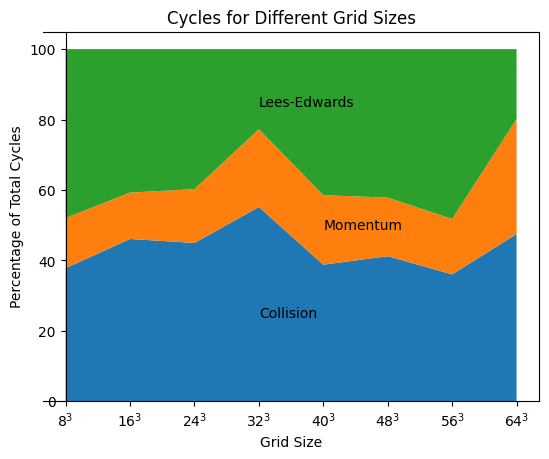

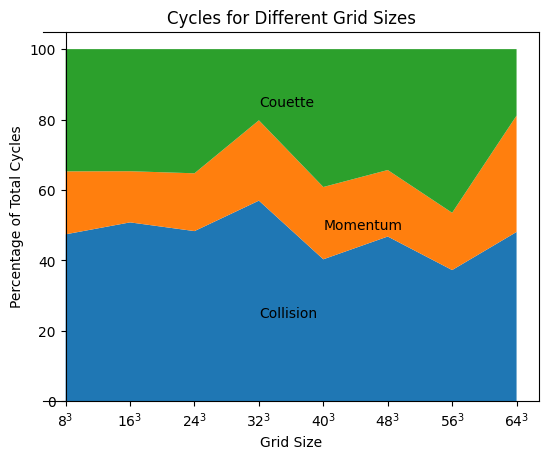

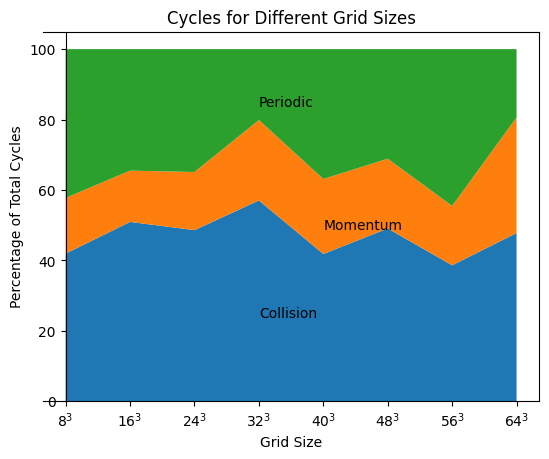

In [182]:

# Stackplots
grid_sizes = ["$4^3$", "$8^3$", "$16^3$", "$32^3$", "$64^3$", "$128^3$"]

collision_cycles1 = collision_baseline_cycles.to_numpy()*100/per_cycles
momentum_cycles1 = momentum_baseline_cycles.to_numpy()*100/per_cycles
stream_cycles1 = periodic_baseline_cycles.to_numpy()*100/per_cycles

collision_cycles2 = collision_baseline_cycles.to_numpy()*100/cou_cycles
momentum_cycles2 = momentum_baseline_cycles.to_numpy()*100/cou_cycles
stream_cycles2 = couette_baseline_cycles.to_numpy()*100/cou_cycles

collision_cycles3 = collision_baseline_cycles.to_numpy()*100/lees_cycles
momentum_cycles3 = momentum_baseline_cycles.to_numpy()*100/lees_cycles
stream_cycles3 = leesed_baseline_cycles.to_numpy()*100/lees_cycles



plot_stack(grid_sizes, collision_cycles3, momentum_cycles3, stream_cycles3, 'Lees-Edwards')

plot_stack(grid_sizes, collision_cycles2, momentum_cycles2, stream_cycles2, 'Couette')

plot_stack(grid_sizes, collision_cycles1, momentum_cycles1, stream_cycles1, 'Periodic')



In [40]:
grid_sizes = ["$4^3$", "$8^3$", "$16^3$", "$32^3$", "$64^3$", "$128^3$", "$256^3$"]

In [65]:
print(c2_cycles)

[3.80083e+04 3.32127e+04 2.58053e+05 2.04441e+06 1.72564e+07 1.66487e+08
 2.62915e+09]


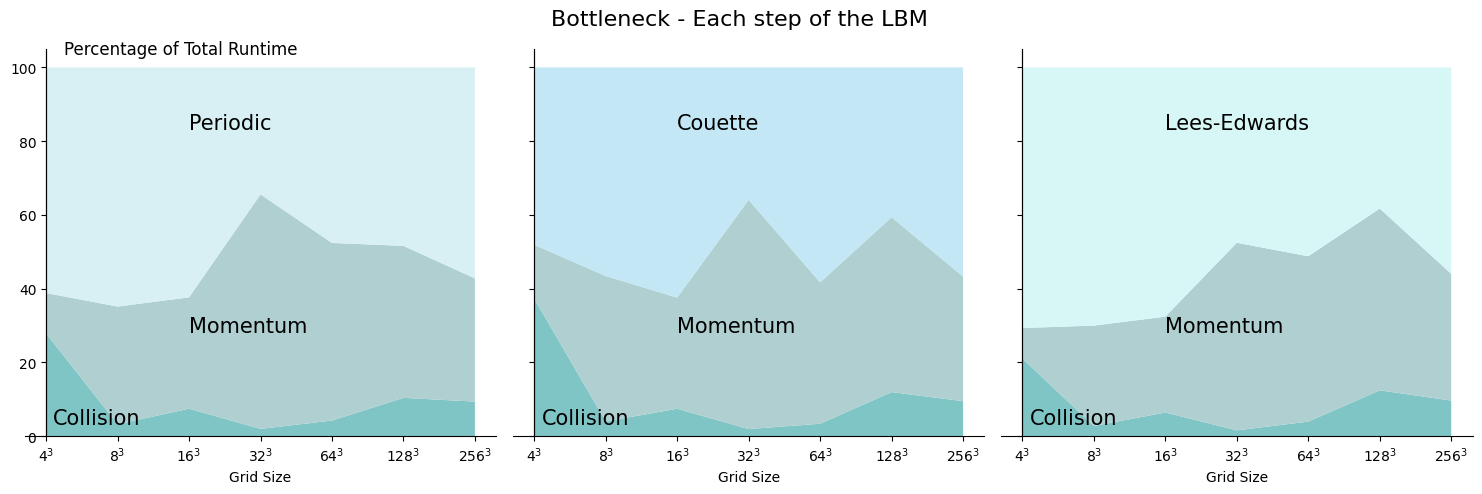

In [66]:
import numpy as np
import matplotlib.pyplot as plt


def plot_stack(ax, grid_sizes, collision_cycles, momentum_cycles, stream_cycles, name, color):
    # Convert grid sizes to a numerical format for the x-axis
    x = np.arange(len(grid_sizes))

    # Stack plot data
    y = np.vstack([collision_cycles, momentum_cycles, stream_cycles])

    # Stack plot
    ax.stackplot(x, y, labels=['Collision', 'Momentum', name], colors=[collision_color, momentum_color, color])

    # Add labels to the stack plot
    ax.text(0.1, 5, 'Collision', fontsize=15, color='black', va='center')
    ax.text(2, 30, 'Momentum', fontsize=15, color='black', va='center')
    ax.text(2, 85, name, fontsize=15, color='black', va='center')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_position('zero')
    ax.spines['top'].set_visible(False)

    # Customizing the plot
    ax.set_xticks(x)
    ax.set_xticklabels(grid_sizes)
    ax.set_xlabel('Grid Size')
    #ax.set_ylabel('Percentage of Total Cycles')
    #ax.set_title('Cycles for Different Grid Sizes')

# Define grid sizes and cycle data for the three cases
grid_sizes = ["$4^3$", "$8^3$", "$16^3$", "$32^3$", "$64^3$", "$128^3$", "$256^3$"]



# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex= True)

# Plot each stack plot on its respective axis
plot_stack(axs[0], grid_sizes, cpb_percentage, mpb_percentage, spb_percentage, 'Periodic', periodic_color)
plot_stack(axs[1], grid_sizes, ccb_percentage, mcb_percentage, scb_percentage, 'Couette', couette_color)
plot_stack(axs[2], grid_sizes, clb_percentage, mlb_percentage, slb_percentage, 'Lees-Edwards', leesed_color)


fig.suptitle('Bottleneck - Each step of the LBM', fontsize=16)
fig.text(0.05, 0.9, 'Percentage of Total Runtime', va='center', rotation='horizontal', fontsize=12)
fig.savefig("bottleneck.svg")
fig.savefig("bottleneck.png")

# Adjust layout
plt.tight_layout()

# Display the combined plot
plt.show()

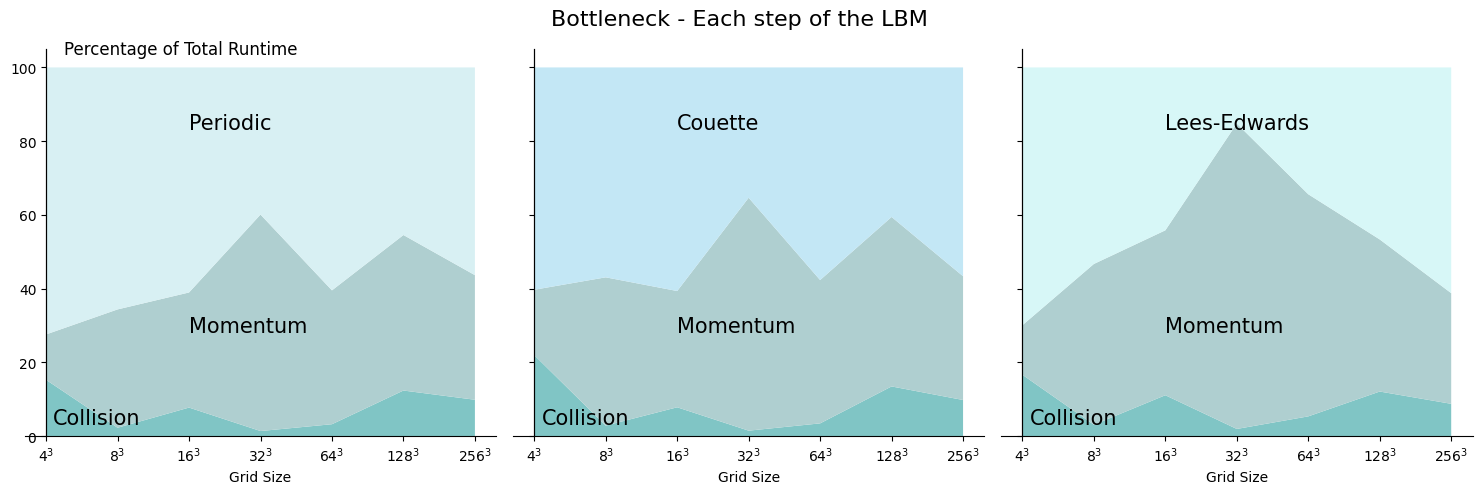

In [67]:
def plot_stack(ax, grid_sizes, collision_cycles, momentum_cycles, stream_cycles, name, color):
    # Convert grid sizes to a numerical format for the x-axis
    x = np.arange(len(grid_sizes))

    # Stack plot data
    y = np.vstack([collision_cycles, momentum_cycles, stream_cycles])

    # Stack plot
    ax.stackplot(x, y, labels=['Collision', 'Momentum', name], colors=[collision_color, momentum_color, color])

    # Add labels to the stack plot
    ax.text(0.1, 5, 'Collision', fontsize=15, color='black', va='center')
    ax.text(2, 30, 'Momentum', fontsize=15, color='black', va='center')
    ax.text(2, 85, name, fontsize=15, color='black', va='center')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_position('zero')
    ax.spines['top'].set_visible(False)

    # Customizing the plot
    ax.set_xticks(x)
    ax.set_xticklabels(grid_sizes)
    ax.set_xlabel('Grid Size')
    #ax.set_ylabel('Percentage of Total Cycles')
    #ax.set_title('Cycles for Different Grid Sizes')

# Define grid sizes and cycle data for the three cases
grid_sizes = ["$4^3$", "$8^3$", "$16^3$", "$32^3$", "$64^3$", "$128^3$", "$256^3$"]



# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex= True)

# Plot each stack plot on its respective axis
plot_stack(axs[0], grid_sizes, cp1_percentage, mp1_percentage, sp1_percentage, 'Periodic', periodic_color)
plot_stack(axs[1], grid_sizes, cc1_percentage, mc1_percentage, sc1_percentage, 'Couette', couette_color)
plot_stack(axs[2], grid_sizes, cl1_percentage, ml1_percentage, sl1_percentage, 'Lees-Edwards', leesed_color)


fig.suptitle('Bottleneck - Each step of the LBM', fontsize=16)
fig.text(0.05, 0.9, 'Percentage of Total Runtime', va='center', rotation='horizontal', fontsize=12)
fig.savefig("b1.svg")
fig.savefig("b1.png")

# Adjust layout
plt.tight_layout()

# Display the combined plot
plt.show()

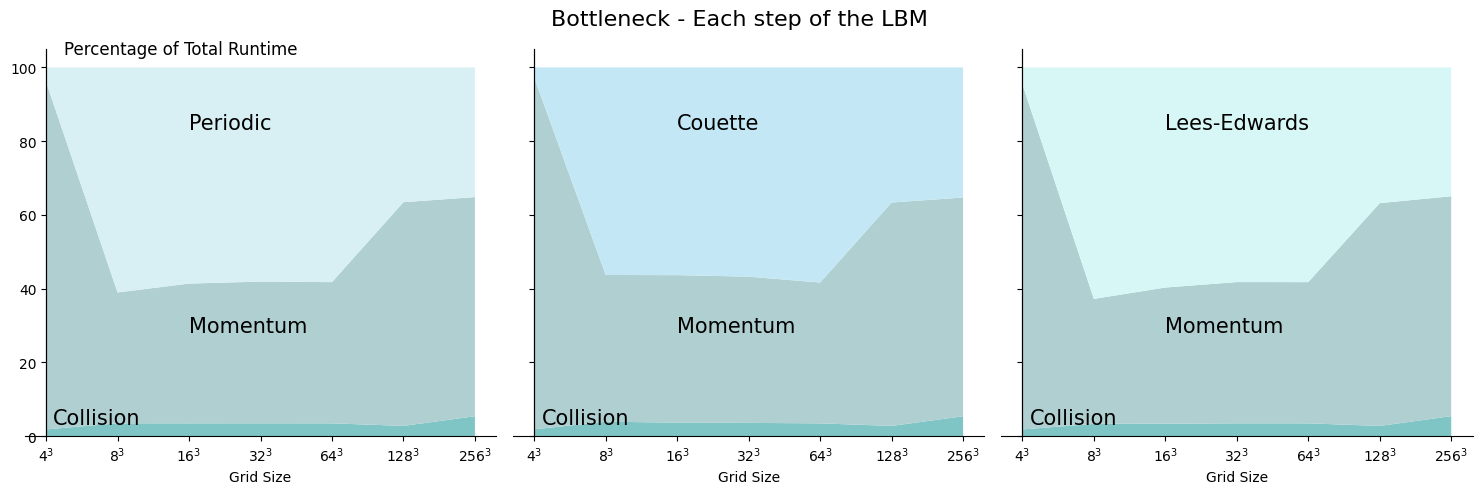

In [68]:

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex= True)

# Plot each stack plot on its respective axis
plot_stack(axs[0], grid_sizes, cp2_percentage, mp2_percentage, sp2_percentage, 'Periodic', periodic_color)
plot_stack(axs[1], grid_sizes, cc2_percentage, mc2_percentage, sc2_percentage, 'Couette', couette_color)
plot_stack(axs[2], grid_sizes, cl2_percentage, ml2_percentage, sl2_percentage, 'Lees-Edwards', leesed_color)


fig.suptitle('Bottleneck - Each step of the LBM', fontsize=16)
fig.text(0.05, 0.9, 'Percentage of Total Runtime', va='center', rotation='horizontal', fontsize=12)
fig.savefig("b2.svg")
fig.savefig("b2.png")

# Adjust layout
plt.tight_layout()

# Display the combined plot
plt.show()

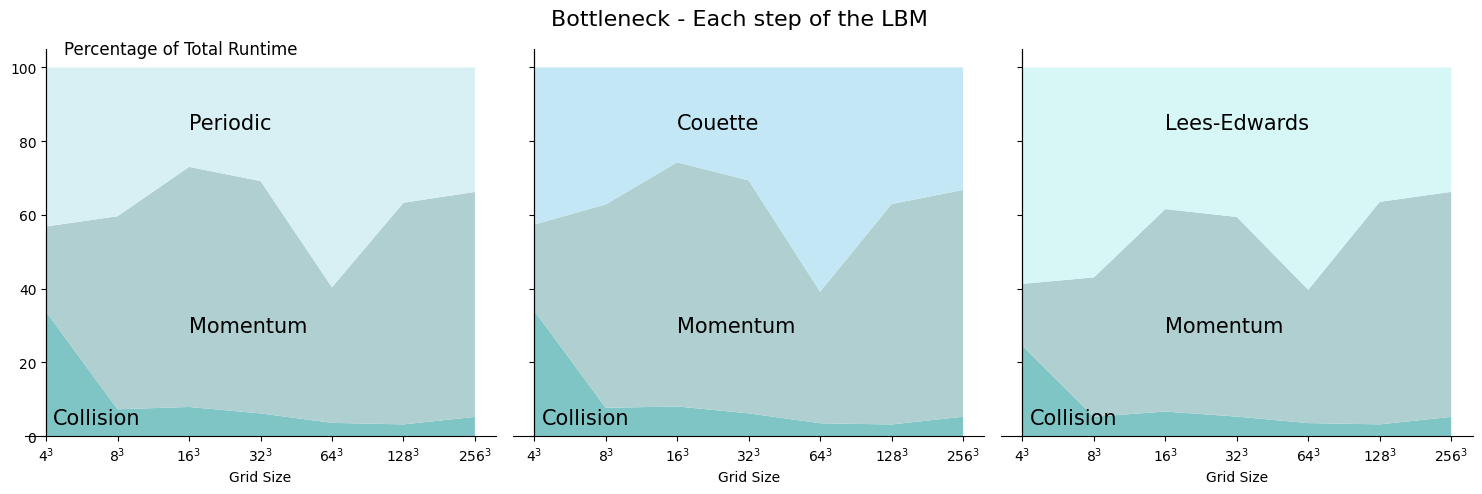

In [69]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex= True)

# Plot each stack plot on its respective axis
plot_stack(axs[0], grid_sizes, cp3_percentage, mp3_percentage, sp3_percentage, 'Periodic', periodic_color)
plot_stack(axs[1], grid_sizes, cc3_percentage, mc3_percentage, sc3_percentage, 'Couette', couette_color)
plot_stack(axs[2], grid_sizes, cl3_percentage, ml3_percentage, sl3_percentage, 'Lees-Edwards', leesed_color)


fig.suptitle('Bottleneck - Each step of the LBM', fontsize=16)
fig.text(0.05, 0.9, 'Percentage of Total Runtime', va='center', rotation='horizontal', fontsize=12)
fig.savefig("b3.svg")
fig.savefig("b3.png")

# Adjust layout
plt.tight_layout()

# Display the combined plot
plt.show()

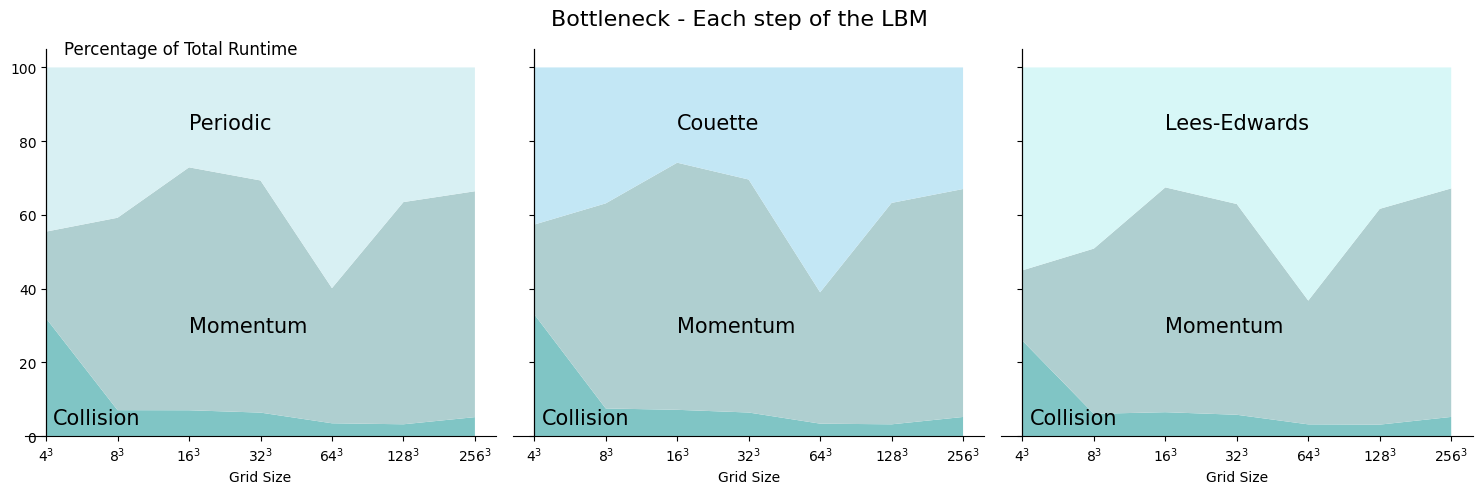

In [70]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex= True)

# Plot each stack plot on its respective axis
plot_stack(axs[0], grid_sizes, cp4_percentage, mp4_percentage, sp4_percentage, 'Periodic', periodic_color)
plot_stack(axs[1], grid_sizes, cc4_percentage, mc4_percentage, sc4_percentage, 'Couette', couette_color)
plot_stack(axs[2], grid_sizes, cl4_percentage, ml4_percentage, sl4_percentage, 'Lees-Edwards', leesed_color)


fig.suptitle('Bottleneck - Each step of the LBM', fontsize=16)
fig.text(0.05, 0.9, 'Percentage of Total Runtime', va='center', rotation='horizontal', fontsize=12)
fig.savefig("b4.svg")
fig.savefig("b4.png")

# Adjust layout
plt.tight_layout()

# Display the combined plot
plt.show()

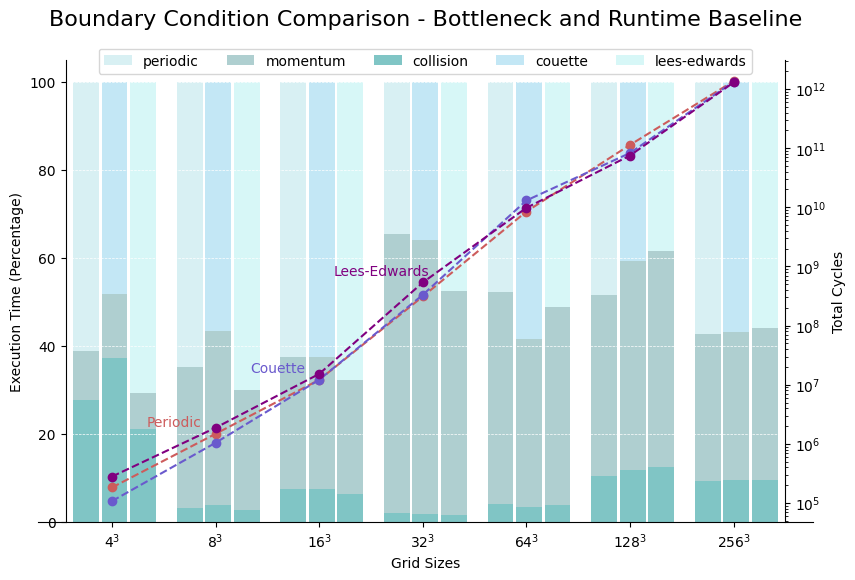

In [71]:



x = np.arange(len(grid_sizes))
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width , cpb_percentage + mpb_percentage + spb_percentage, label='periodic', color=periodic_color, width=width)
ax.bar(x - width , cpb_percentage + mpb_percentage, label='momentum', color=momentum_color, width=width)
ax.bar(x - width , cpb_percentage, label='collision', color=collision_color, width=width)

ax.bar(x + 0.025, ccb_percentage + mcb_percentage + scb_percentage, label='couette', color=couette_color, width=width)
ax.bar(x+ 0.025, ccb_percentage + mcb_percentage, color=momentum_color, width=width)
ax.bar(x+ 0.025, ccb_percentage, color=collision_color, width=width)

ax.bar(x + width + 0.05, clb_percentage + mlb_percentage+ slb_percentage, label='lees-edwards', color=leesed_color, width=width)
ax.bar(x + width+ 0.05, clb_percentage + mlb_percentage, color=momentum_color, width=width)
ax.bar(x + width+ 0.05 , clb_percentage, color=collision_color, width=width)

ax2 = ax.twinx()
#ax2.plot(x - width, per_cycles, color='red', linestyle='--', marker='o', label='Total Cycles Periodic')
#ax2.plot(x + 0.025, cou_cycles, color='pink', linestyle='--', marker='o', label='Total Cycles Couette')
#ax2.plot(x + width + 0.05, lees_cycles, color='purple', linestyle='--', marker='o', label='Total Cycles Lees-Edwards')

ax2.plot(x, pb_cycles, color=per_sat, linestyle='--', marker='o')
ax2.plot(x, cob_cycles, color=cou_sat, linestyle='--', marker='o')
ax2.plot(x, lb_cycles, color=leesed_sat, linestyle='--', marker='o')



ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', -20))
ax2.spines['right'].set_position(('outward', -20))
ax2.spines['top'].set_visible(False)


ax2.annotate('Periodic', (x[1] - 0.2, pb_cycles[1]), textcoords="offset points", xytext=(5,5), ha='right', color=per_sat)
ax2.annotate('Couette', (x[2] - 0.2, cob_cycles[2]), textcoords="offset points", xytext=(5,5), ha='right', color=cou_sat)
ax2.annotate('Lees-Edwards', (x[3], lb_cycles[3]), textcoords="offset points", xytext=(5,5), ha='right', color=leesed_sat)

ax2.set_ylabel('Total Cycles')
#ax2.legend(loc='upper right')
ax2.set_yscale('log')
ax.grid(True, color='white', linestyle='--', linewidth=0.5, axis='y')


ax.set_xlabel('Grid Sizes')
ax.set_ylabel('Execution Time (Percentage)')
ax.set_title('Boundary Condition Comparison - Bottleneck and Runtime Baseline', loc='center', pad=25, fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(grid_sizes)
#ax.set_yscale('log')
ax.legend(ncol=5, loc = 'upper center', bbox_to_anchor=(0.5, 1.04))

fig.savefig("bottleneck_baseline.svg")
fig.savefig("bottleneck_baseline.png")

plt.show()

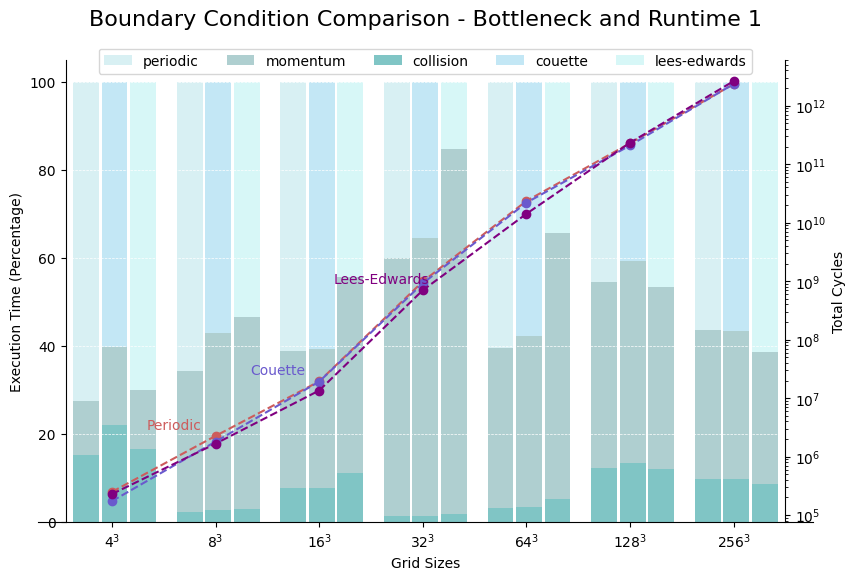

In [72]:


x = np.arange(len(grid_sizes))
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width , cp1_percentage + mp1_percentage + sp1_percentage, label='periodic', color=periodic_color, width=width)
ax.bar(x - width , cp1_percentage + mp1_percentage, label='momentum', color=momentum_color, width=width)
ax.bar(x - width , cp1_percentage, label='collision', color=collision_color, width=width)

ax.bar(x + 0.025, cc1_percentage + mc1_percentage + sc1_percentage, label='couette', color=couette_color, width=width)
ax.bar(x+ 0.025, cc1_percentage + mc1_percentage, color=momentum_color, width=width)
ax.bar(x+ 0.025, cc1_percentage, color=collision_color, width=width)

ax.bar(x + width + 0.05, cl1_percentage + ml1_percentage+ sl1_percentage, label='lees-edwards', color=leesed_color, width=width)
ax.bar(x + width+ 0.05, cl1_percentage + ml1_percentage, color=momentum_color, width=width)
ax.bar(x + width+ 0.05 , cl1_percentage, color=collision_color, width=width)

ax2 = ax.twinx()
#ax2.plot(x - width, per_cycles, color='red', linestyle='--', marker='o', label='Total Cycles Periodic')
#ax2.plot(x + 0.025, cou_cycles, color='pink', linestyle='--', marker='o', label='Total Cycles Couette')
#ax2.plot(x + width + 0.05, lees_cycles, color='purple', linestyle='--', marker='o', label='Total Cycles Lees-Edwards')

ax2.plot(x, tp1_cycles, color=per_sat, linestyle='--', marker='o')
ax2.plot(x, tc1_cycles, color=cou_sat, linestyle='--', marker='o')
ax2.plot(x, tl1_cycles, color=leesed_sat, linestyle='--', marker='o')



ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', -20))
ax2.spines['right'].set_position(('outward', -20))
ax2.spines['top'].set_visible(False)


ax2.annotate('Periodic', (x[1] - 0.2, tp1_cycles[1]), textcoords="offset points", xytext=(5,5), ha='right', color=per_sat)
ax2.annotate('Couette', (x[2] - 0.2, tc1_cycles[2]), textcoords="offset points", xytext=(5,5), ha='right', color=cou_sat)
ax2.annotate('Lees-Edwards', (x[3], tl1_cycles[3]), textcoords="offset points", xytext=(5,5), ha='right', color=leesed_sat)

ax2.set_ylabel('Total Cycles')
#ax2.legend(loc='upper right')
ax2.set_yscale('log')
ax.grid(True, color='white', linestyle='--', linewidth=0.5, axis='y')


ax.set_xlabel('Grid Sizes')
ax.set_ylabel('Execution Time (Percentage)')
ax.set_title('Boundary Condition Comparison - Bottleneck and Runtime 1', loc='center', pad=25, fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(grid_sizes)
#ax.set_yscale('log')
ax.legend(ncol=5, loc = 'upper center', bbox_to_anchor=(0.5, 1.04))

fig.savefig("bottleneck1.svg")
fig.savefig("bottleneck1.png")

plt.show()

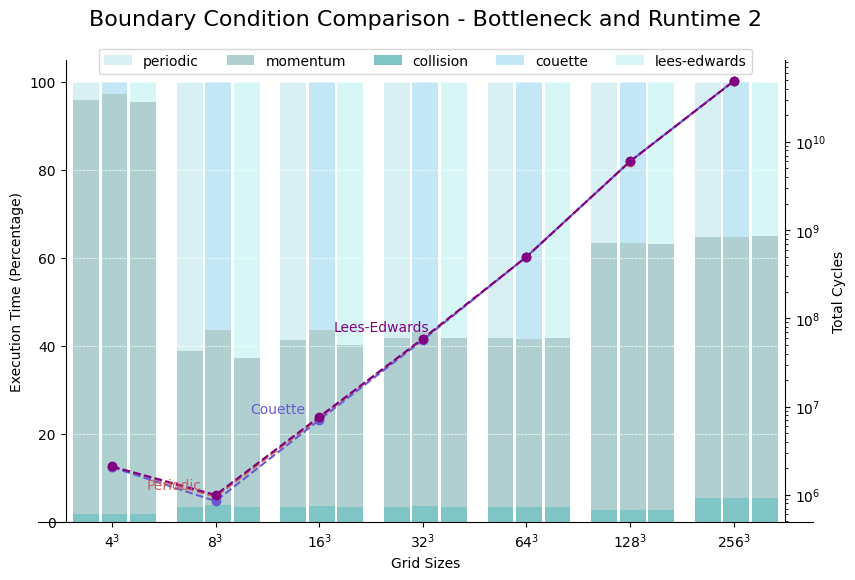

In [74]:


x = np.arange(len(grid_sizes))
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width , cp2_percentage + mp2_percentage + sp2_percentage, label='periodic', color=periodic_color, width=width)
ax.bar(x - width , cp2_percentage + mp2_percentage, label='momentum', color=momentum_color, width=width)
ax.bar(x - width , cp2_percentage, label='collision', color=collision_color, width=width)

ax.bar(x + 0.025, cc2_percentage + mc2_percentage + sc2_percentage, label='couette', color=couette_color, width=width)
ax.bar(x+ 0.025, cc2_percentage + mc2_percentage, color=momentum_color, width=width)
ax.bar(x+ 0.025, cc2_percentage, color=collision_color, width=width)

ax.bar(x + width + 0.05, cl2_percentage + ml2_percentage+ sl2_percentage, label='lees-edwards', color=leesed_color, width=width)
ax.bar(x + width+ 0.05, cl2_percentage + ml2_percentage, color=momentum_color, width=width)
ax.bar(x + width+ 0.05 , cl2_percentage, color=collision_color, width=width)

ax2 = ax.twinx()
#ax2.plot(x - width, per_cycles, color='red', linestyle='--', marker='o', label='Total Cycles Periodic')
#ax2.plot(x + 0.025, cou_cycles, color='pink', linestyle='--', marker='o', label='Total Cycles Couette')
#ax2.plot(x + width + 0.05, lees_cycles, color='purple', linestyle='--', marker='o', label='Total Cycles Lees-Edwards')

ax2.plot(x, tp2_cycles, color=per_sat, linestyle='--', marker='o')
ax2.plot(x, tc2_cycles, color=cou_sat, linestyle='--', marker='o')
ax2.plot(x, tl2_cycles, color=leesed_sat, linestyle='--', marker='o')




ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', -20))
ax2.spines['right'].set_position(('outward', -20))
ax2.spines['top'].set_visible(False)


ax2.annotate('Periodic', (x[1] - 0.2, tp2_cycles[1]), textcoords="offset points", xytext=(5,5), ha='right', color=per_sat)
ax2.annotate('Couette', (x[2] - 0.2, tc2_cycles[2]), textcoords="offset points", xytext=(5,5), ha='right', color=cou_sat)
ax2.annotate('Lees-Edwards', (x[3], tl2_cycles[3]), textcoords="offset points", xytext=(5,5), ha='right', color=leesed_sat)

ax2.set_ylabel('Total Cycles')
#ax2.legend(loc='upper right')
ax2.set_yscale('log')
ax.grid(True, color='white', linestyle='--', linewidth=0.5, axis='y')


ax.set_xlabel('Grid Sizes')
ax.set_ylabel('Execution Time (Percentage)')
ax.set_title('Boundary Condition Comparison - Bottleneck and Runtime 2', loc='center', pad=25, fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(grid_sizes)
#ax.set_yscale('log')
ax.legend(ncol=5, loc = 'upper center', bbox_to_anchor=(0.5, 1.04))

fig.savefig("bottleneck2.svg")
fig.savefig("bottleneck2.png")

plt.show()

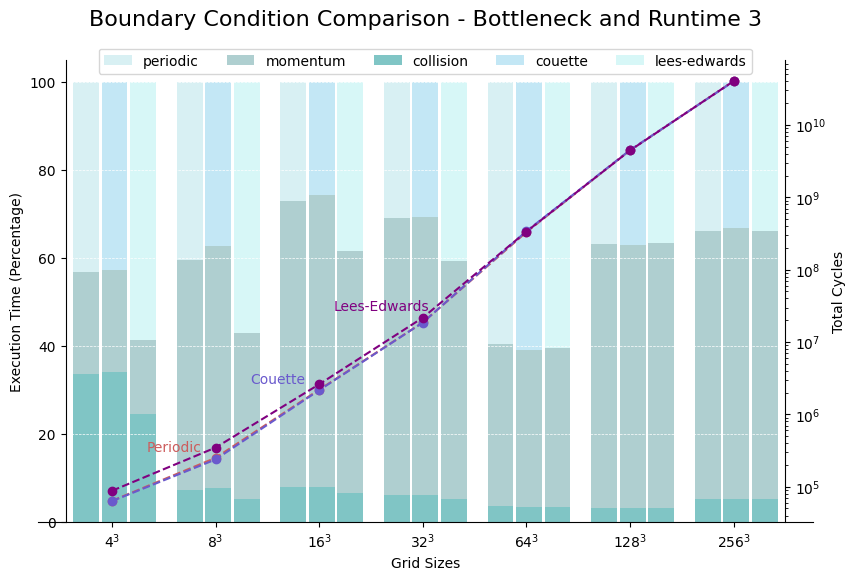

In [75]:


x = np.arange(len(grid_sizes))
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width , cp3_percentage + mp3_percentage + sp3_percentage, label='periodic', color=periodic_color, width=width)
ax.bar(x - width , cp3_percentage + mp3_percentage, label='momentum', color=momentum_color, width=width)
ax.bar(x - width , cp3_percentage, label='collision', color=collision_color, width=width)

ax.bar(x + 0.025, cc3_percentage + mc3_percentage + sc3_percentage, label='couette', color=couette_color, width=width)
ax.bar(x+ 0.025, cc3_percentage + mc3_percentage, color=momentum_color, width=width)
ax.bar(x+ 0.025, cc3_percentage, color=collision_color, width=width)

ax.bar(x + width + 0.05, cl3_percentage + ml3_percentage+ sl3_percentage, label='lees-edwards', color=leesed_color, width=width)
ax.bar(x + width+ 0.05, cl3_percentage + ml3_percentage, color=momentum_color, width=width)
ax.bar(x + width+ 0.05 , cl3_percentage, color=collision_color, width=width)

ax2 = ax.twinx()
#ax2.plot(x - width, per_cycles, color='red', linestyle='--', marker='o', label='Total Cycles Periodic')
#ax2.plot(x + 0.025, cou_cycles, color='pink', linestyle='--', marker='o', label='Total Cycles Couette')
#ax2.plot(x + width + 0.05, lees_cycles, color='purple', linestyle='--', marker='o', label='Total Cycles Lees-Edwards')

ax2.plot(x, tp3_cycles, color=per_sat, linestyle='--', marker='o')
ax2.plot(x, tc3_cycles, color=cou_sat, linestyle='--', marker='o')
ax2.plot(x, tl3_cycles, color=leesed_sat, linestyle='--', marker='o')





ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', -20))
ax2.spines['right'].set_position(('outward', -20))
ax2.spines['top'].set_visible(False)


ax2.annotate('Periodic', (x[1] - 0.2, tp3_cycles[1]), textcoords="offset points", xytext=(5,5), ha='right', color=per_sat)
ax2.annotate('Couette', (x[2] - 0.2, tc3_cycles[2]), textcoords="offset points", xytext=(5,5), ha='right', color=cou_sat)
ax2.annotate('Lees-Edwards', (x[3], tl3_cycles[3]), textcoords="offset points", xytext=(5,5), ha='right', color=leesed_sat)

ax2.set_ylabel('Total Cycles')
#ax2.legend(loc='upper right')
ax2.set_yscale('log')
ax.grid(True, color='white', linestyle='--', linewidth=0.5, axis='y')


ax.set_xlabel('Grid Sizes')
ax.set_ylabel('Execution Time (Percentage)')
ax.set_title('Boundary Condition Comparison - Bottleneck and Runtime 3', loc='center', pad=25, fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(grid_sizes)
#ax.set_yscale('log')
ax.legend(ncol=5, loc = 'upper center', bbox_to_anchor=(0.5, 1.04))
fig.savefig("bottleneck3.svg")
fig.savefig("bottleneck3.png")
plt.show()

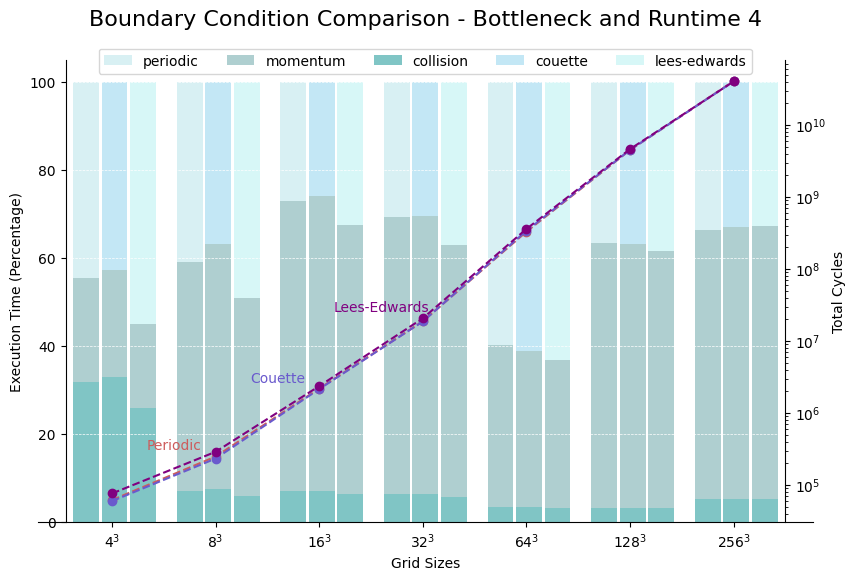

In [76]:


x = np.arange(len(grid_sizes))
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width , cp4_percentage + mp4_percentage + sp4_percentage, label='periodic', color=periodic_color, width=width)
ax.bar(x - width , cp4_percentage + mp4_percentage, label='momentum', color=momentum_color, width=width)
ax.bar(x - width , cp4_percentage, label='collision', color=collision_color, width=width)

ax.bar(x + 0.025, cc4_percentage + mc4_percentage + sc4_percentage, label='couette', color=couette_color, width=width)
ax.bar(x+ 0.025, cc4_percentage + mc4_percentage, color=momentum_color, width=width)
ax.bar(x+ 0.025, cc4_percentage, color=collision_color, width=width)

ax.bar(x + width + 0.05, cl4_percentage + ml4_percentage+ sl4_percentage, label='lees-edwards', color=leesed_color, width=width)
ax.bar(x + width+ 0.05, cl4_percentage + ml4_percentage, color=momentum_color, width=width)
ax.bar(x + width+ 0.05 , cl4_percentage, color=collision_color, width=width)

ax2 = ax.twinx()
#ax2.plot(x - width, per_cycles, color='red', linestyle='--', marker='o', label='Total Cycles Periodic')
#ax2.plot(x + 0.025, cou_cycles, color='pink', linestyle='--', marker='o', label='Total Cycles Couette')
#ax2.plot(x + width + 0.05, lees_cycles, color='purple', linestyle='--', marker='o', label='Total Cycles Lees-Edwards')

ax2.plot(x, tp4_cycles, color=per_sat, linestyle='--', marker='o')
ax2.plot(x, tc4_cycles, color=cou_sat, linestyle='--', marker='o')
ax2.plot(x, tl4_cycles, color=leesed_sat, linestyle='--', marker='o')






ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', -20))
ax2.spines['right'].set_position(('outward', -20))
ax2.spines['top'].set_visible(False)


ax2.annotate('Periodic', (x[1] - 0.2, tp4_cycles[1]), textcoords="offset points", xytext=(5,5), ha='right', color=per_sat)
ax2.annotate('Couette', (x[2] - 0.2, tc4_cycles[2]), textcoords="offset points", xytext=(5,5), ha='right', color=cou_sat)
ax2.annotate('Lees-Edwards', (x[3], tl4_cycles[3]), textcoords="offset points", xytext=(5,5), ha='right', color=leesed_sat)

ax2.set_ylabel('Total Cycles')
#ax2.legend(loc='upper right')
ax2.set_yscale('log')
ax.grid(True, color='white', linestyle='--', linewidth=0.5, axis='y')


ax.set_xlabel('Grid Sizes')
ax.set_ylabel('Execution Time (Percentage)')
ax.set_title('Boundary Condition Comparison - Bottleneck and Runtime 4', loc='center', pad=25, fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(grid_sizes)
#ax.set_yscale('log')
ax.legend(ncol=5, loc = 'upper center', bbox_to_anchor=(0.5, 1.04))

fig.savefig("bottleneck4.svg")
fig.savefig("bottleneck4.png")

plt.show()